In [22]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import keras
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
 

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
Fish categories: ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


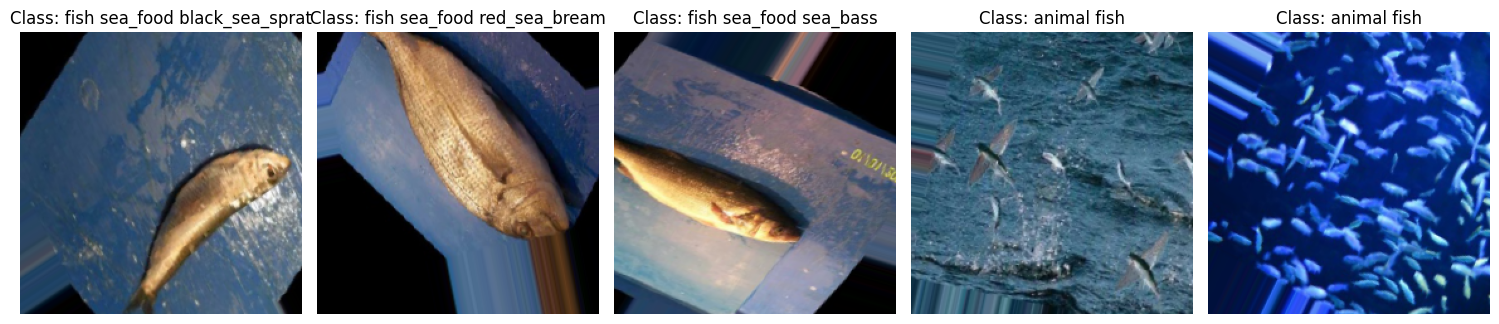

In [11]:
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define paths - corrected to use string paths directly
train_dir = "C:\\Users\\mona2\\GUVI2024\\train"
val_dir = "C:\\Users\\mona2\\GUVI2024\\val"
test_dir = "C:\\Users\\mona2\\GUVI2024\\test"

# Image parameters
img_width, img_height = 224, 224
batch_size = 32

# Create data generators
# Training generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Validation and test generators (only rescaling, no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators that will read images from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get class names for reference
class_names = list(train_generator.class_indices.keys())
print(f"Fish categories: {class_names}")

# Function to display augmented images
def show_augmented_images(generator, num_images=5):
    # Get a batch of images
    images, labels = next(generator)
    plt.figure(figsize=(15, 5))
    
    for i in range(min(num_images, len(images))):  # Added a safeguard here
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(f"Class: {class_names[np.argmax(labels[i])]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Show some augmented training images
try:
    show_augmented_images(train_generator)
except Exception as e:
    print(f"Error displaying images: {e}")

In [27]:

#Train a CNN Model from Scratch

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam  # Added import for Adam optimizer


# Define the CNN model
def build_cnn_model(input_shape=(224, 224, 3), num_classes=11):
    model = keras.Sequential([
        # First convolutional block
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_width, img_height, 3)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Second convolutional block
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Third convolutional block
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Fully connected layers
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Instantiate and summarize the model
cnn_model = build_cnn_model()
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 51,677,227 (197.13 MB)

 Trainable params: 51,675,307 (197.13 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [34]:
# Train the model using the generators
cnn_model = build_cnn_model()  
# Create both training and validation generators
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'C:\\Users\\mona2\\GUVI2024\\train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'C:\\Users\\mona2\\GUVI2024\\val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Now fit the model
history_cnn = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# Save the model
cnn_model.save("cnn_fish_model.h5")


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 716s 4s/step - accuracy: 0.6032 - loss: 1.3227 - val_accuracy: 0.2527 - val_loss: 6.6148
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 700s 4s/step - accuracy: 0.9175 - loss: 0.2559 - val_accuracy: 0.2848 - val_loss: 8.8239
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 700s 4s/step - accuracy: 0.9401 - loss: 0.1877 - val_accuracy: 0.5421 - val_loss: 3.1681
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 698s 4s/step - accuracy: 0.9526 - loss: 0.1447 - val_accuracy: 0.7005 - val_loss: 0.9441
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 698s 4s/step - accuracy: 0.9657 - loss: 0.1047 - val_accuracy: 0.3443 - val_loss: 4.9923
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 699s 4s/step - accuracy: 0.9544 - loss: 0.1434 - val_accuracy: 0.9643 - val_loss: 0.1567
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 701s 4s/step - accuracy: 0.9757 - loss: 0.0691 - val_accuracy: 0.3022 - val_loss: 3.9595
Epoch 8/10


100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 631ms/step


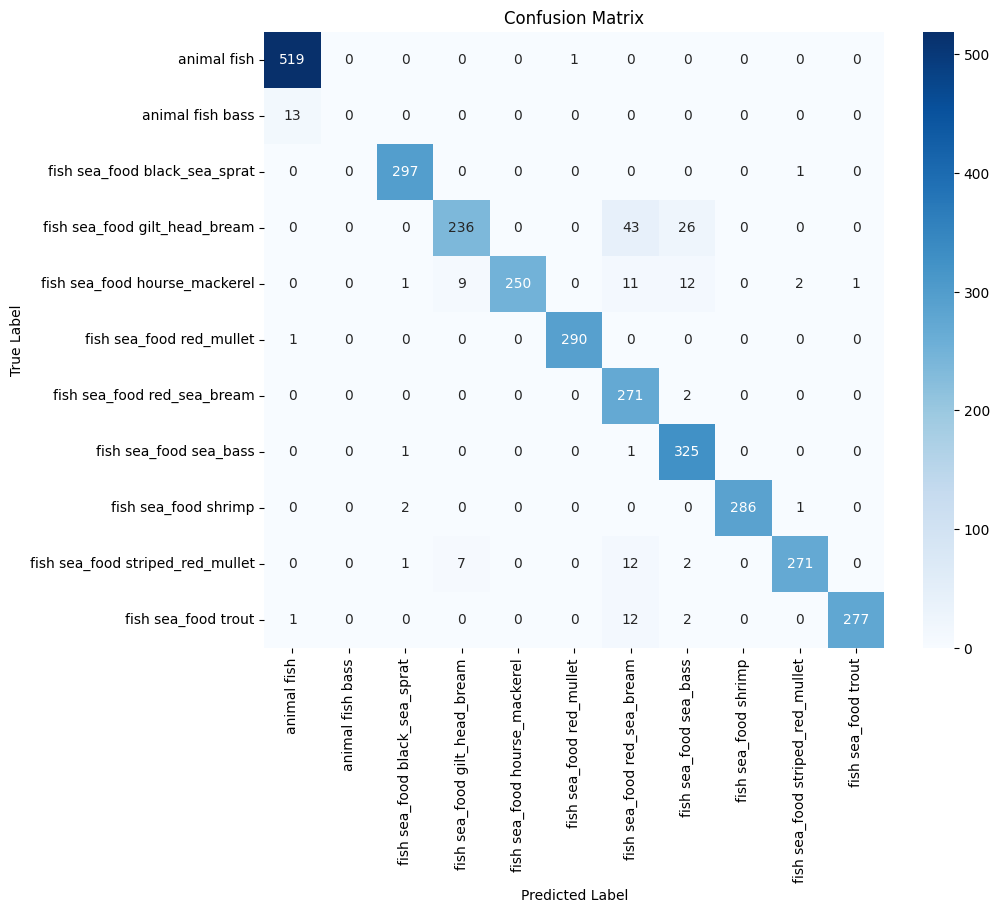

Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       0.97      1.00      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.98      1.00      0.99       298
   fish sea_food gilt_head_bream       0.94      0.77      0.85       305
   fish sea_food hourse_mackerel       1.00      0.87      0.93       286
        fish sea_food red_mullet       1.00      1.00      1.00       291
     fish sea_food red_sea_bream       0.77      0.99      0.87       273
          fish sea_food sea_bass       0.88      0.99      0.93       327
            fish sea_food shrimp       1.00      0.99      0.99       289
fish sea_food striped_red_mullet       0.99      0.92      0.95       293
             fish sea_food trout       1.00      0.95      0.97       292

                        accuracy                           0.95      3187
             

C:\Users\mona2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mona2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mona2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 552ms/step - accuracy: 0.9526 - loss: 0.1918

Test Accuracy: 94.82%


In [69]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Load saved model
from tensorflow.keras.models import load_model
cnn_model = load_model("cnn_fish_model.h5")

# Generate predictions
y_pred = cnn_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, 
                yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(y_true, y_pred_classes, class_names)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Test Accuracy
test_loss, test_acc = cnn_model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_acc:.2%}")


In [38]:
#Use Pre-Trained models

def build_pretrained_model(base_model_name, input_shape=(224, 224, 3), num_classes=11):
    base_model = None
    
    if base_model_name == "VGG16":
        base_model = tf.keras.applications.VGG16(include_top=False, input_shape=input_shape, weights="imagenet")
    elif base_model_name == "ResNet50":
        base_model = tf.keras.applications.ResNet50(include_top=False, input_shape=input_shape, weights="imagenet")
    elif base_model_name == "MobileNet":
        base_model = tf.keras.applications.MobileNetV2(include_top=False, input_shape=input_shape, weights="imagenet")
    elif base_model_name == "InceptionV3":
        base_model = tf.keras.applications.InceptionV3(include_top=False, input_shape=input_shape, weights="imagenet")
    elif base_model_name == "EfficientNetB0":
        base_model = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=input_shape, weights="imagenet")

    # Freeze base model layers
    base_model.trainable = False

    # Add classification head
    model = keras.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Example: Use ResNet50
resnet_model = build_pretrained_model("VGG16")
resnet_model.summary()
resnet_model = build_pretrained_model("ResNet50")
resnet_model.summary()
resnet_model = build_pretrained_model("MobileNet")
resnet_model.summary()
resnet_model = build_pretrained_model("InceptionV3")
resnet_model.summary()
resnet_model = build_pretrained_model("EfficientNetB0")
resnet_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,982,987 (57.16 MB)

 Trainable params: 268,299 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,642,443 (94.00 MB)

 Trainable params: 1,054,731 (4.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,919,499 (11.14 MB)

 Trainable params: 661,515 (2.52 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,857,515 (87.19 MB)

 Trainable params: 1,054,731 (4.02 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,711,086 (17.97 MB)

 Trainable params: 661,515 (2.52 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [42]:
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def build_pretrained_model(base_model, num_classes=11):
    base_model.trainable = False  # Freeze base model
    model = Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

pretrained_models = {
    "VGG16": VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3)),
    "ResNet50": ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3)),
    "MobileNet": MobileNet(weights="imagenet", include_top=False, input_shape=(224, 224, 3)),
    "InceptionV3": InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3)),
    "EfficientNetB0": EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
}

histories = {}

for model_name, base_model in pretrained_models.items():
    print(f"\nTraining {model_name}...\n")
    model = build_pretrained_model(base_model)
    history = model.fit(train_generator,
    validation_data=val_generator, epochs=10)
    
    # Save model
    model.save(f"{model_name}_fish_model.h5")
    
    # Store history for visualization
    histories[model_name] = history








Training VGG16...

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 768s 4s/step - accuracy: 0.1168 - loss: 2.4972 - val_accuracy: 0.3242 - val_loss: 2.0954
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 734s 4s/step - accuracy: 0.2976 - loss: 2.0834 - val_accuracy: 0.4350 - val_loss: 1.9117
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 733s 4s/step - accuracy: 0.3975 - loss: 1.8881 - val_accuracy: 0.5531 - val_loss: 1.7595
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 734s 4s/step - accuracy: 0.4555 - loss: 1.7648 - val_accuracy: 0.6044 - val_loss: 1.6297
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 810s 4s/step - accuracy: 0.5149 - loss: 1.6245 - val_accuracy: 0.6438 - val_loss: 1.5164
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 976s 5s/step - accuracy: 0.5539 - loss: 1.5198 - val_accuracy: 0.6932 - val_loss: 1.4127
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 903s 5s/step - accuracy: 0.5912 - loss: 1.4380 - val_accuracy: 0.7234 - val_loss: 1.3180
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 885s 5s/step - accuracy: 0.6254 - los


Training ResNet50...

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.1181 - loss: 2.5291 - val_accuracy: 0.1712 - val_loss: 2.2930
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 288s 1s/step - accuracy: 0.1697 - loss: 2.3018 - val_accuracy: 0.1712 - val_loss: 2.2706
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.1830 - loss: 2.2691 - val_accuracy: 0.1703 - val_loss: 2.2437
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.1823 - loss: 2.2519 - val_accuracy: 0.1804 - val_loss: 2.2238
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.1864 - loss: 2.2291 - val_accuracy: 0.1731 - val_loss: 2.1981
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.1837 - loss: 2.2180 - val_accuracy: 0.1685 - val_loss: 2.1735
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.2043 - loss: 2.1901 - val_accuracy: 0.2079 - val_loss: 2.1560
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.2220 - 


Training MobileNet...

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 90s 439ms/step - accuracy: 0.2741 - loss: 2.3082 - val_accuracy: 0.8480 - val_loss: 0.8509
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 99s 505ms/step - accuracy: 0.7199 - loss: 0.9046 - val_accuracy: 0.9332 - val_loss: 0.4246
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 90s 461ms/step - accuracy: 0.8321 - loss: 0.5613 - val_accuracy: 0.9560 - val_loss: 0.2634
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 88s 451ms/step - accuracy: 0.8953 - loss: 0.3790 - val_accuracy: 0.9716 - val_loss: 0.1866
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 83s 428ms/step - accuracy: 0.9263 - loss: 0.2782 - val_accuracy: 0.9753 - val_loss: 0.1369
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 87s 444ms/step - accuracy: 0.9443 - loss: 0.2277 - val_accuracy: 0.9799 - val_loss: 0.1056
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 94s 481ms/step - accuracy: 0.9561 - loss: 0.1809 - val_accuracy: 0.9863 - val_loss: 0.0861
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 94s 483ms/step - ac


Training InceptionV3...

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.3171 - loss: 2.0777 - val_accuracy: 0.8636 - val_loss: 0.6749
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 184s 942ms/step - accuracy: 0.7637 - loss: 0.7770 - val_accuracy: 0.9029 - val_loss: 0.3823
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 183s 941ms/step - accuracy: 0.8475 - loss: 0.5034 - val_accuracy: 0.9286 - val_loss: 0.2801
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 183s 939ms/step - accuracy: 0.8845 - loss: 0.3771 - val_accuracy: 0.9423 - val_loss: 0.2242
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 179s 918ms/step - accuracy: 0.9092 - loss: 0.2933 - val_accuracy: 0.9524 - val_loss: 0.1870
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 174s 895ms/step - accuracy: 0.9314 - loss: 0.2432 - val_accuracy: 0.9542 - val_loss: 0.1670
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 174s 892ms/step - accuracy: 0.9326 - loss: 0.2170 - val_accuracy: 0.9551 - val_loss: 0.1543
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 174s 893ms/st


Training EfficientNetB0...

Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 143s 632ms/step - accuracy: 0.1449 - loss: 2.3741 - val_accuracy: 0.1712 - val_loss: 2.3290
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 119s 608ms/step - accuracy: 0.1653 - loss: 2.3375 - val_accuracy: 0.1712 - val_loss: 2.3250
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 119s 609ms/step - accuracy: 0.1635 - loss: 2.3385 - val_accuracy: 0.1712 - val_loss: 2.3220
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 118s 607ms/step - accuracy: 0.1640 - loss: 2.3303 - val_accuracy: 0.1712 - val_loss: 2.3182
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 120s 613ms/step - accuracy: 0.1731 - loss: 2.3231 - val_accuracy: 0.1712 - val_loss: 2.3148
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 119s 613ms/step - accuracy: 0.1832 - loss: 2.3183 - val_accuracy: 0.1712 - val_loss: 2.3143
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 119s 608ms/step - accuracy: 0.1678 - loss: 2.3209 - val_accuracy: 0.1712 - val_loss: 2.3164
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 118s 60


Evaluating VGG16...



100/100 ━━━━━━━━━━━━━━━━━━━━ 355s 4s/step


C:\Users\mona2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


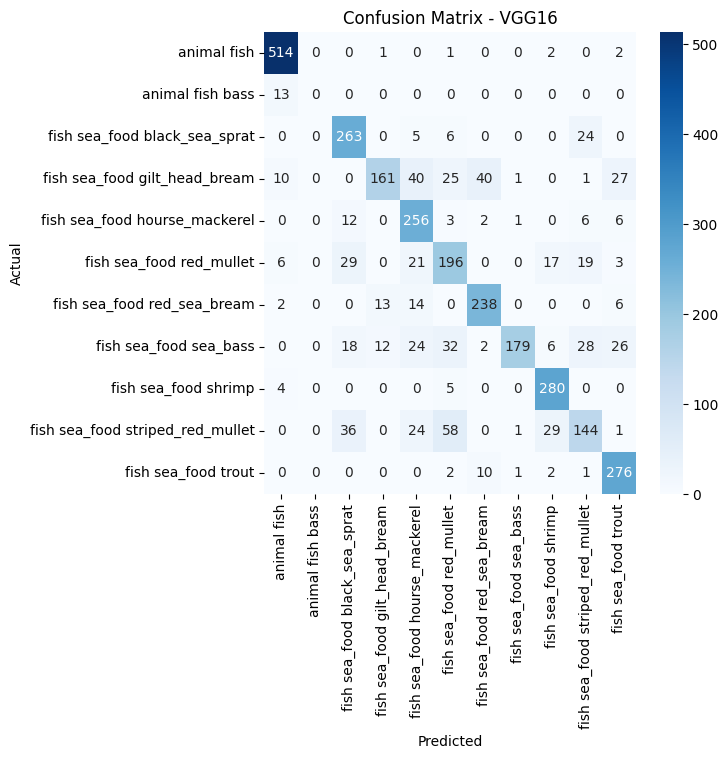


Evaluating ResNet50...



100/100 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step


C:\Users\mona2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


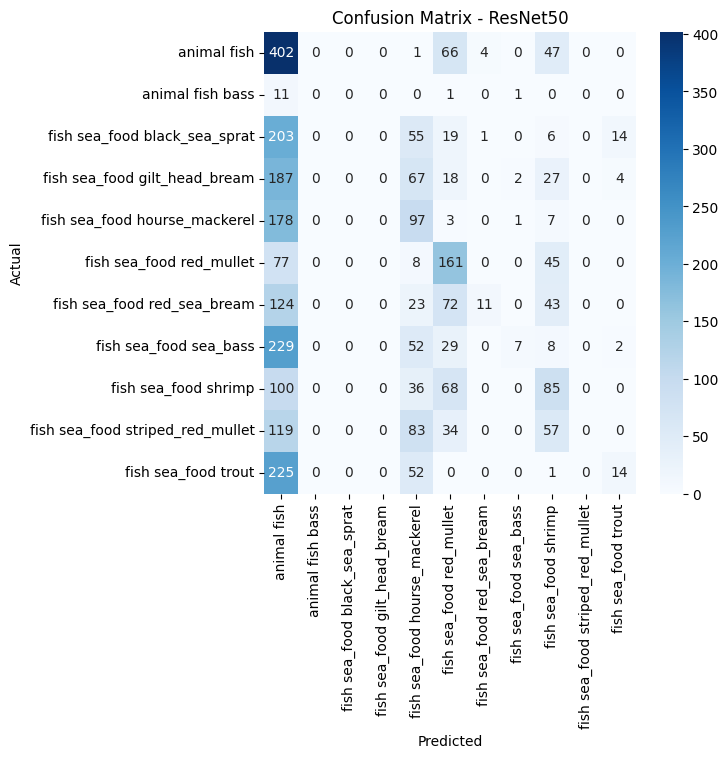


Evaluating MobileNet...



100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 433ms/step


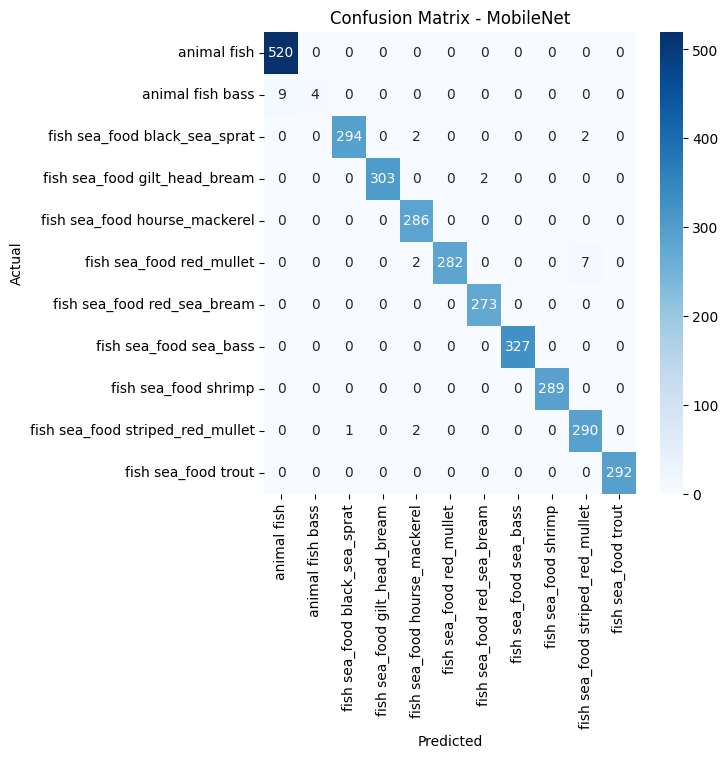


Evaluating InceptionV3...



100/100 ━━━━━━━━━━━━━━━━━━━━ 91s 884ms/step


C:\Users\mona2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


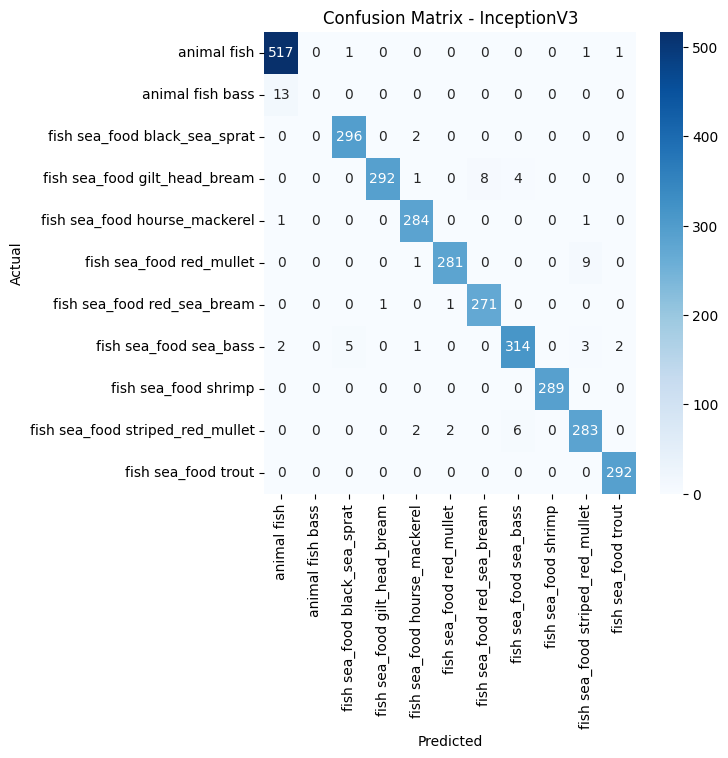


Evaluating EfficientNetB0...



100/100 ━━━━━━━━━━━━━━━━━━━━ 67s 622ms/step


C:\Users\mona2\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


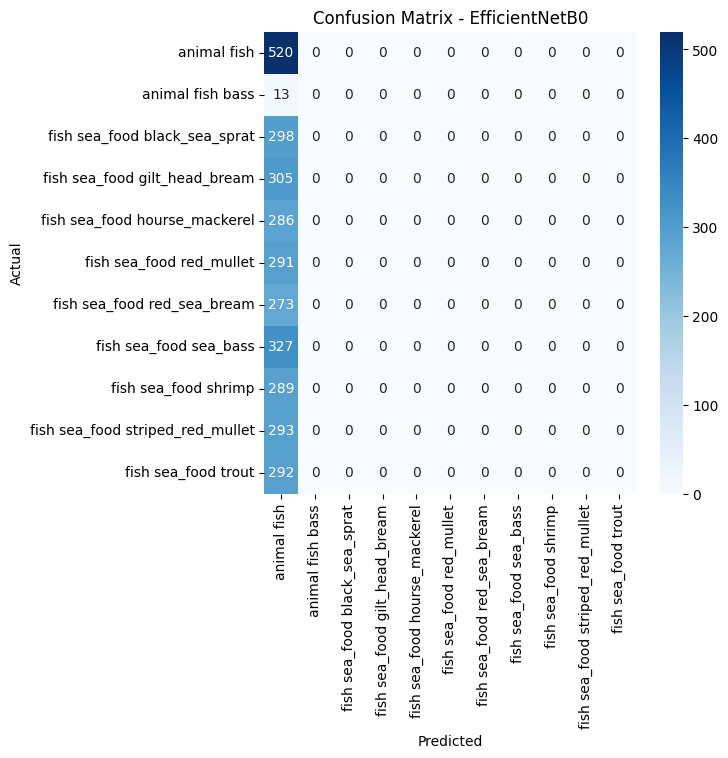


Model Comparison Metrics:

VGG16:
  Accuracy: 78.66%
  Precision: 79.62%
  Recall: 78.66%
  F1-score: 77.68%
------------------------------
ResNet50:
  Accuracy: 24.38%
  Precision: 27.05%
  Recall: 24.38%
  F1-score: 16.04%
------------------------------
MobileNet:
  Accuracy: 99.15%
  Precision: 99.17%
  Recall: 99.15%
  F1-score: 99.08%
------------------------------
InceptionV3:
  Accuracy: 97.87%
  Precision: 97.48%
  Recall: 97.87%
  F1-score: 97.66%
------------------------------
EfficientNetB0:
  Accuracy: 16.32%
  Precision: 2.66%
  Recall: 16.32%
  F1-score: 4.58%
------------------------------


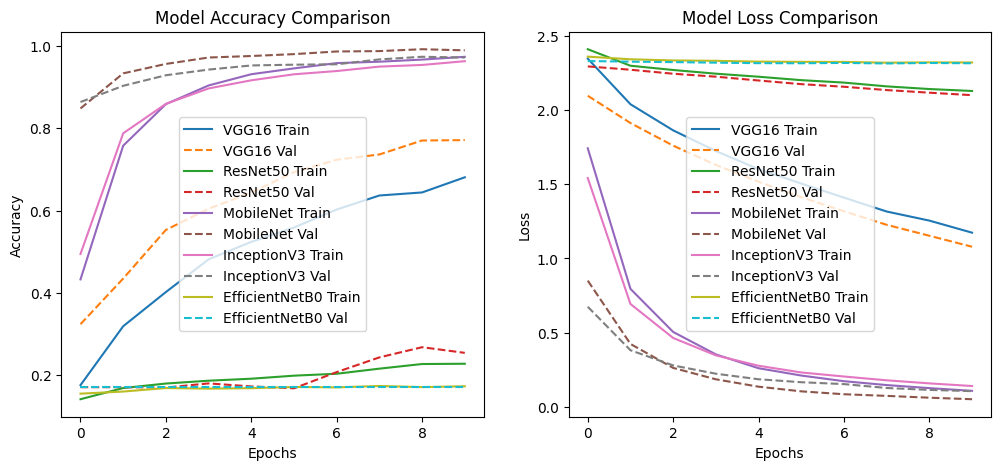

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import load_model

# Dictionary to store evaluation metrics
evaluation_metrics = {}

# Evaluate each model
for model_name in histories.keys():
    print(f"\nEvaluating {model_name}...\n")
    
    # Load the saved model
    model = load_model(f"{model_name}_fish_model.h5")
    
    # Make predictions on test data
    y_true = test_generator.classes
    y_pred_probs = model.predict(test_generator)  # Get probabilities
    y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels
    
    # Calculate metrics
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Store metrics
    evaluation_metrics[model_name] = {
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }
    
    # Display Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Print evaluation results for all models
print("\nModel Comparison Metrics:\n")
for model, metrics in evaluation_metrics.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.2%}")
    print("-" * 30)

# Compare Training Histories: Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
for model_name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f"{model_name} Train")
    plt.plot(history.history['val_accuracy'], linestyle='dashed', label=f"{model_name} Val")
plt.title("Model Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
for model_name, history in histories.items():
    plt.plot(history.history['loss'], label=f"{model_name} Train")
    plt.plot(history.history['val_loss'], linestyle='dashed', label=f"{model_name} Val")
plt.title("Model Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


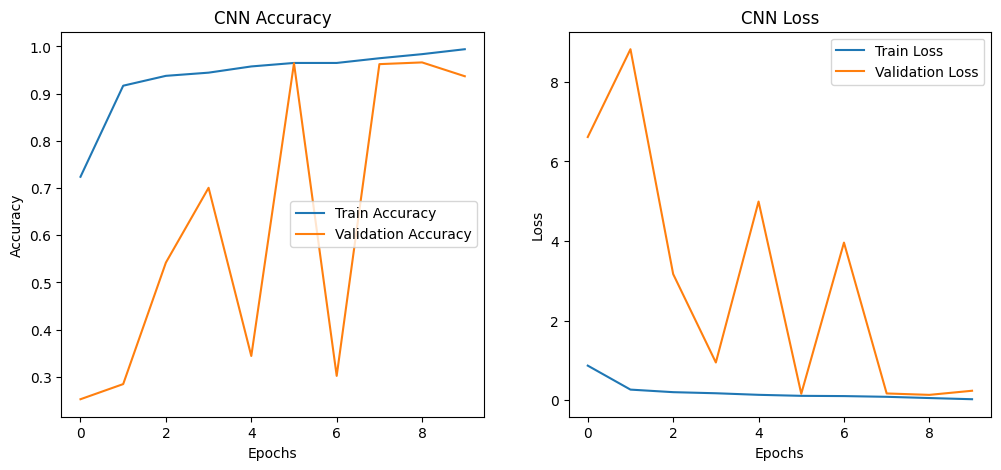

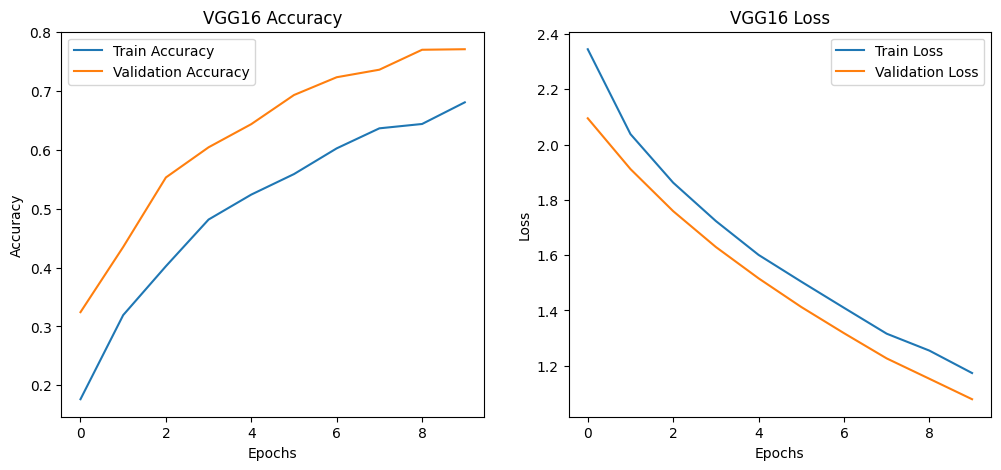

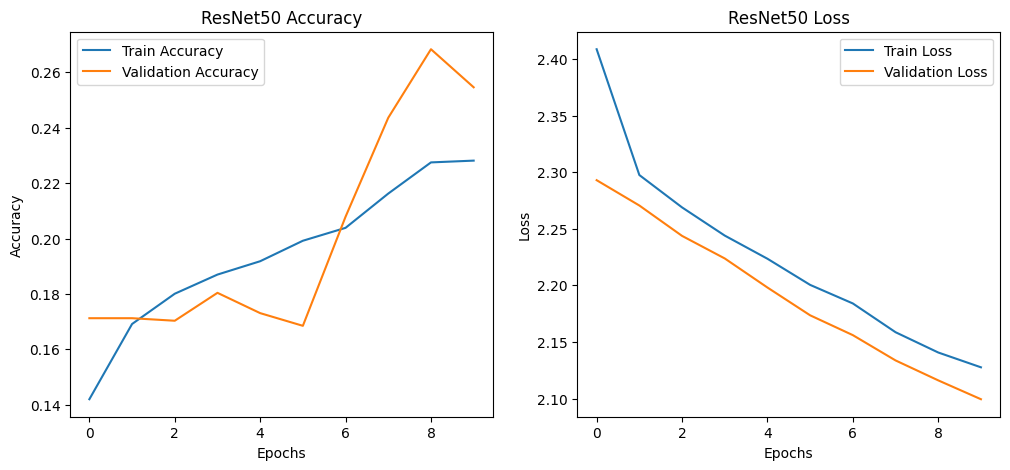

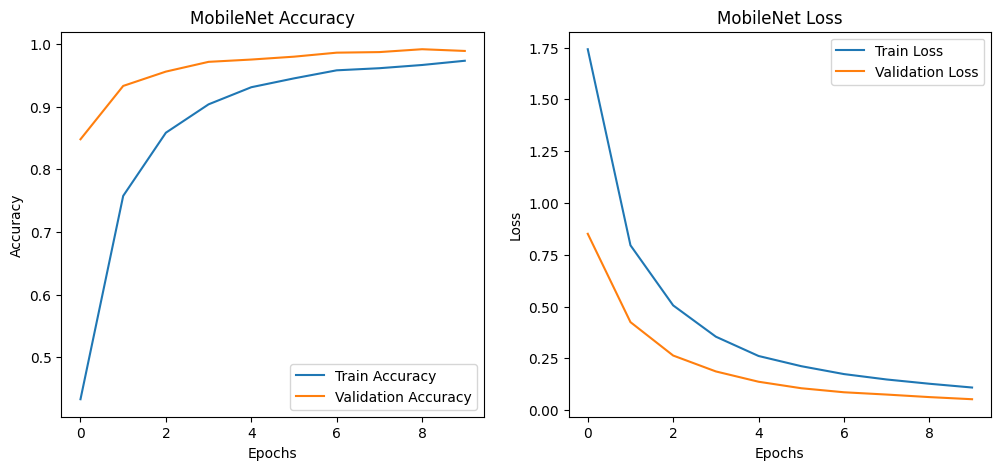

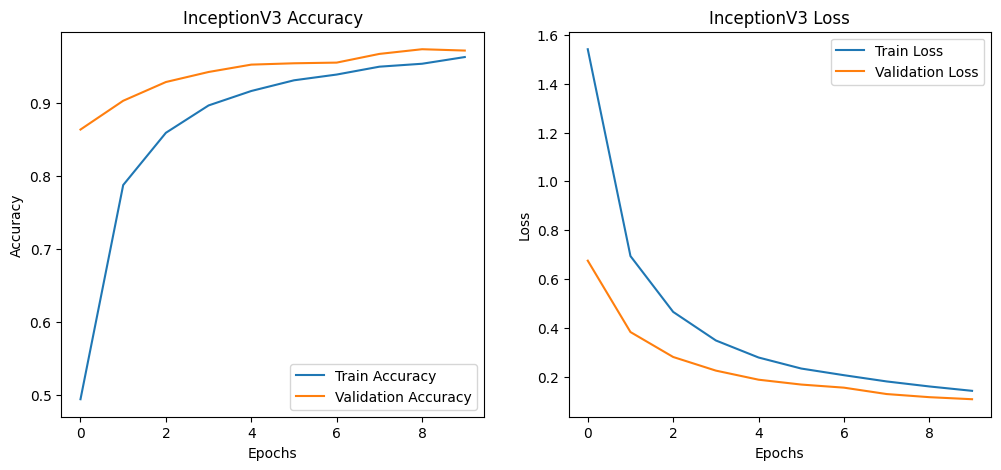

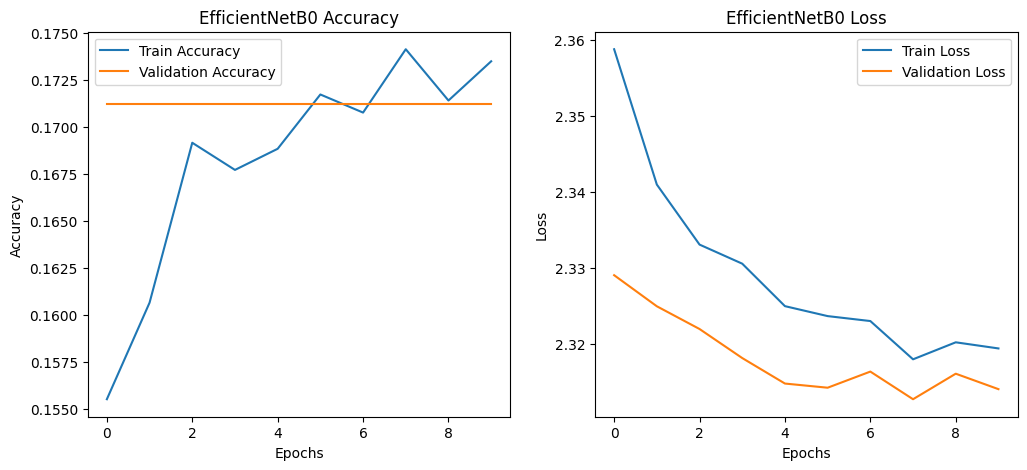

In [46]:
def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.show()

# Plot CNN training history
plot_training_history(history_cnn, "CNN")

# Plot Pretrained Models Training Histories
for model_name, history in histories.items():
    plot_training_history(history, model_name)


In [75]:
# List of models to train and evaluate
models = [
    ("VGG16", VGG16(weights='imagenet', include_top=False, input_shape=input_shape)),
    ("ResNet50", ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)),
    ("MobileNet", MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)),
    ("InceptionV3", InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)),
    ("EfficientNetB0", EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)),
    ("ScratchCNN", None)  # Flag for scratch model
]

best_model = None
best_accuracy = 0
epochs = 20  # Adjustable epochs

for model_name, base_model in models:
    print(f"\nTraining {model_name}...")
    
    if model_name == "ScratchCNN":
        # Train from-scratch model
        model = build_scratch_cnn(input_shape=input_shape, num_classes=train_generator.num_classes)
        model.compile(
            optimizer=tf.keras.optimizers.Adam(),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        early_stop = tf.keras.callbacks.EarlyStopping(
            monitor="val_accuracy",
            patience=5,
            restore_best_weights=True
        )
        
        history = model.fit(
            train_generator,
            validation_data=val_generator,
            epochs=epochs,
            callbacks=[early_stop],
            verbose=1  # Adds progress output during training
        )
        
        val_accuracy = max(history.history['val_accuracy'])
    
    else:
        # Fine-tune pre-trained models
        model, val_accuracy = fine_tune_model(base_model, train_generator, val_generator, epochs=epochs)
    
    # Test evaluation (common for all models)
    test_loss, test_acc = model.evaluate(test_generator)
    
    print(f"{model_name} Results:")
    print(f"- Validation Accuracy: {val_accuracy:.2%}")
    print(f"- Test Accuracy: {test_acc:.2%}")

    if test_acc > best_accuracy:
        best_accuracy = test_acc
        best_model = model

# Save best-performing model
best_model.save(f"best_model_{best_accuracy:.2%}_test_acc.h5")
print(f"\nBest model saved with test accuracy: {best_accuracy:.2%}")



Training VGG16...
Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 898s 5s/step - accuracy: 0.0893 - loss: 2.5361 - val_accuracy: 0.2115 - val_loss: 2.2702
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 881s 5s/step - accuracy: 0.1601 - loss: 2.3317 - val_accuracy: 0.1749 - val_loss: 2.1746
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 793s 4s/step - accuracy: 0.2199 - loss: 2.2339 - val_accuracy: 0.2866 - val_loss: 2.0997
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 761s 4s/step - accuracy: 0.2293 - loss: 2.1808 - val_accuracy: 0.3837 - val_loss: 2.0353
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 756s 4s/step - accuracy: 0.2637 - loss: 2.1038 - val_accuracy: 0.4698 - val_loss: 1.9782
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 757s 4s/step - accuracy: 0.2911 - loss: 2.0449 - val_accuracy: 0.5046 - val_loss: 1.9277
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 761s 4s/step - accuracy: 0.3106 - loss: 1.9979 - val_accuracy: 0.5568 - val_loss: 1.8794
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 757s 4s/step - accuracy: 0.3243 - loss

C:\Users\mona2\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 733s 4s/step - accuracy: 0.3925 - loss: 2.0411 - val_accuracy: 0.1529 - val_loss: 8.9642
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 718s 4s/step - accuracy: 0.6496 - loss: 0.9981 - val_accuracy: 0.3114 - val_loss: 7.4848
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 721s 4s/step - accuracy: 0.7589 - loss: 0.6983 - val_accuracy: 0.5513 - val_loss: 2.1024
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 717s 4s/step - accuracy: 0.8202 - loss: 0.5203 - val_accuracy: 0.7656 - val_loss: 0.7447
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 717s 4s/step - accuracy: 0.8612 - loss: 0.3868 - val_accuracy: 0.8745 - val_loss: 0.3081
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 715s 4s/step - accuracy: 0.8793 - loss: 0.3401 - val_accuracy: 0.7894 - val_loss: 0.6732
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 715s 4s/step - accuracy: 0.9055 - loss: 0.3006 - val_accuracy: 0.4615 - val_loss: 3.1450
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 723s 4s/step - accuracy: 0.9167 - loss: 0.2547 - val_accu

ScratchCNN Results:
- Validation Accuracy: 90.75%
- Test Accuracy: 90.30%

Best model saved with test accuracy: 98.74%


In [99]:
class_labels = list(train_generator.class_indices.keys())
print(class_labels)


['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


In [103]:
%%writefile fishapp.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"  # Suppress TensorFlow logs

import tensorflow as tf
# Load the trained model
@st.cache_resource
def load_model():
    model = tf.keras.models.load_model("MobileNet_fish_model.h5")  # Ensure correct model path
    return model

model = load_model()

# Get class labels dynamically
class_labels = ['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']  # actual fish names


# Image preprocessing function
def preprocess_image(image):
    img = image.resize((224, 224))  # Ensure input shape matches the model
    img_array = np.array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Streamlit UI
st.title("🐟 Fish Species Classification")
st.write("Upload an image of a fish, and the model will predict its category.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_container_width=True)

    # Preprocess and predict
    img_array = preprocess_image(image)
    predictions = model.predict(img_array)[0]  # Get prediction scores
    predicted_class = class_labels[np.argmax(predictions)]
    confidence = np.max(predictions) * 100  # Convert to percentage

    # Display results
    st.subheader(f"🎯 Prediction: **{predicted_class}**")
    st.write(f"🔹 **Confidence:** {confidence:.2f}%")

    # Show confidence scores
    st.write("### Confidence Scores:")
    for label, score in zip(class_labels, predictions):
        st.write(f"- {label}: {score:.2%}")

    # Optional: Display a bar chart for confidence scores
    st.bar_chart(predictions)

st.write("🔹 Model trained using deep learning on a fish species dataset.")



Overwriting fishapp.py
